# Análise Exploratória - Acidentes de trânsito no Brasil

<p> Utilizando dados oficiais da policia rodoviaría federal, vamos analisar os dados de acidentes de trânsito no Brasil. </p>

In [77]:
# Instalando bibliotecas
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [78]:
# Importando bibliotecas
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
# Carrega os dados dos acidentes
df = pd.read_csv('acidents_prf_2023.csv', sep=';', encoding='iso-8859-1',  on_bad_lines='skip', quoting=csv.QUOTE_NONE)
df.head()

,"""id""","""pesid""","""data_inversa""","""dia_semana""","""horario""","""uf""","""br""","""km""","""municipio""","""causa_principal""",...,"""sexo""","""ilesos""","""feridos_leves""","""feridos_graves""","""mortos""","""latitude""","""longitude""","""regional""","""delegacia""","""uop"""
0,496506,1082142.0,2023-01-01,"""domingo""","""00:15:00""","""MG""",116.0,587,"""MANHUACU""","""Não""",...,"""Masculino""",0.0,1.0,0.0,0.0,"-20,24173903","-42,15868042","""SPRF-MG""","""DEL06-MG""","""UOP03-DEL06-MG"""
1,496506,1082142.0,2023-01-01,"""domingo""","""00:15:00""","""MG""",116.0,587,"""MANHUACU""","""Não""",...,"""Masculino""",0.0,1.0,0.0,0.0,"-20,24173903","-42,15868042","""SPRF-MG""","""DEL06-MG""","""UOP03-DEL06-MG"""
2,496506,1082142.0,2023-01-01,"""domingo""","""00:15:00""","""MG""",116.0,587,"""MANHUACU""","""Sim""",...,"""Masculino""",0.0,1.0,0.0,0.0,"-20,24173903","-42,15868042","""SPRF-MG""","""DEL06-MG""","""UOP03-DEL06-MG"""
3,496506,1082142.0,2023-01-01,"""domingo""","""00:15:00""","""MG""",116.0,587,"""MANHUACU""","""Sim""",...,"""Masculino""",0.0,1.0,0.0,0.0,"-20,24173903","-42,15868042","""SPRF-MG""","""DEL06-MG""","""UOP03-DEL06-MG"""
4,496507,1082138.0,2023-01-01,"""domingo""","""00:20:00""","""MG""",381.0,"686,5","""LAVRAS""","""Sim""",...,"""Masculino""",0.0,1.0,0.0,0.0,"-21,17928973","-45,12256622","""SPRF-MG""","""DEL04-MG""","""UOP02-DEL04-MG"""


In [80]:
print('Total de Linhas: {}. Total de Colunas: {}' .format(df.shape[0],df.shape[1]))

Total de Linhas: 135390. Total de Colunas: 37


In [81]:
# Remove "" aspas duplas redundantes do arquivo
df.columns = df.columns.str.replace('"', '')

# Remove as aspas duplas dos valores na coluna 'tipo_veiculo'
df['uf'] = df['uf'].str.replace('"', '')
df['horario'] = df['horario'].str.replace('"', '')
df['municipio'] = df['municipio'].str.replace('"', '')
df['tipo_veiculo'] = df['tipo_veiculo'].str.replace('"', '')

df.columns = df.columns.str.lower()

columns_to_drop = ['pesid', 'ano_fabricacao_veiculo', 'marca']
df = df.drop(columns=columns_to_drop)

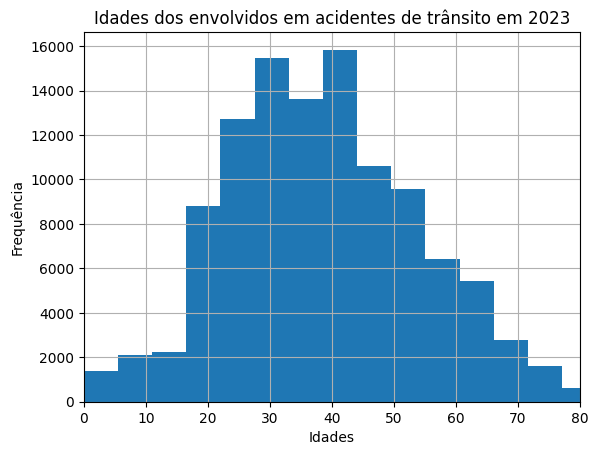

In [82]:
num_bins = int(math.sqrt(len(df['idade'] < 100)))
df['idade'].hist(bins=num_bins)
plt.title('Idades dos envolvidos em acidentes de trânsito em 2023')
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.xlim([0, 80])
plt.show()

Text(0.5, 1.0, 'Acidentes por tipo de veículo em 2023')

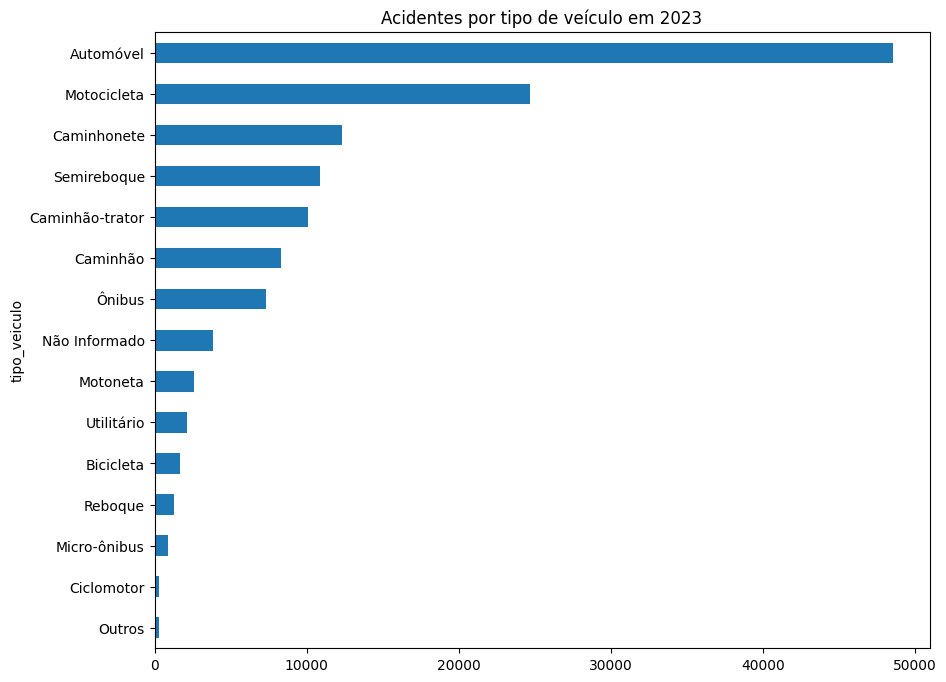

In [83]:
acidentes_por_veiculo = df['tipo_veiculo'].value_counts()
acidentes_por_veiculo = acidentes_por_veiculo.dropna()
acidentes_por_veiculo = acidentes_por_veiculo[acidentes_por_veiculo > 150]
acidentes_por_veiculo = acidentes_por_veiculo.sort_values(ascending=True)
acidentes_por_veiculo.plot(kind='barh', figsize=(10, 8))
plt.title('Acidentes por tipo de veículo em 2023')


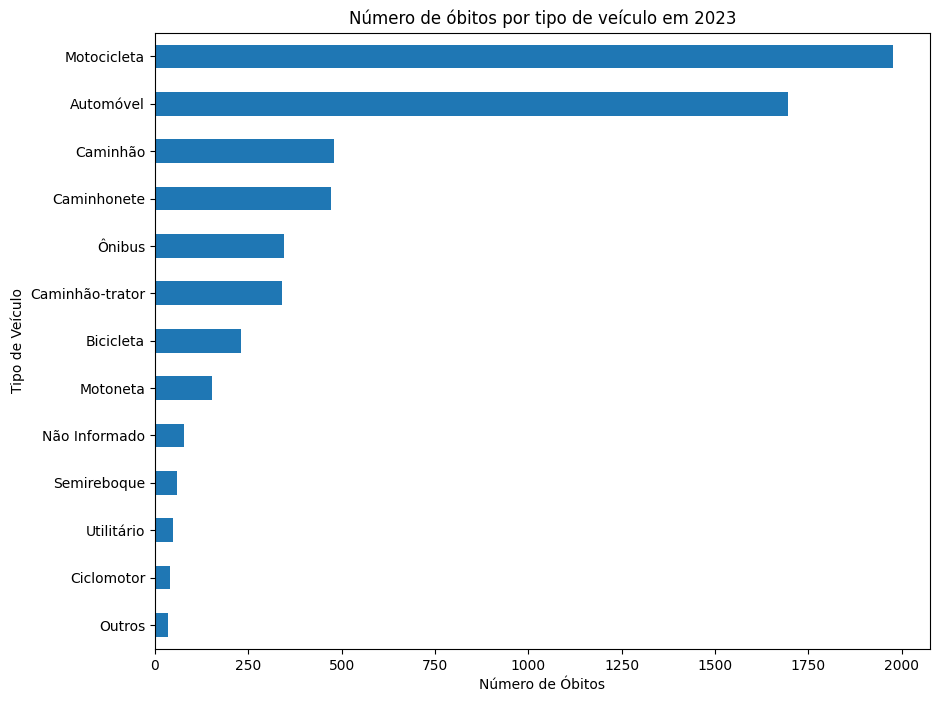

In [84]:
# Agrupa os dados por tipo de veículo e soma o número de óbitos em cada grupo
obitos_por_veiculo = df.groupby('tipo_veiculo')['mortos'].sum()

obitos_por_veiculo = obitos_por_veiculo.sort_values(ascending=True)

obitos_por_veiculo = obitos_por_veiculo[obitos_por_veiculo > 30]
# Plota um gráfico de barras dos dados agrupados
obitos_por_veiculo.plot(kind='barh', figsize=(10, 8))

plt.title('Número de óbitos por tipo de veículo em 2023')
plt.ylabel('Tipo de Veículo')
plt.xlabel('Número de Óbitos')
plt.show()

In [85]:
df['data_inversa'].value_counts()

data_inversa
2023-03-29    2739
2023-03-05    2339
2023-01-31    2192
2023-02-19    2117
2023-02-18    2100
              ... 
2023-03-23     906
2023-03-28     903
2023-02-23     890
2023-04-04     876
2023-03-01     725
Name: count, Length: 95, dtype: int64

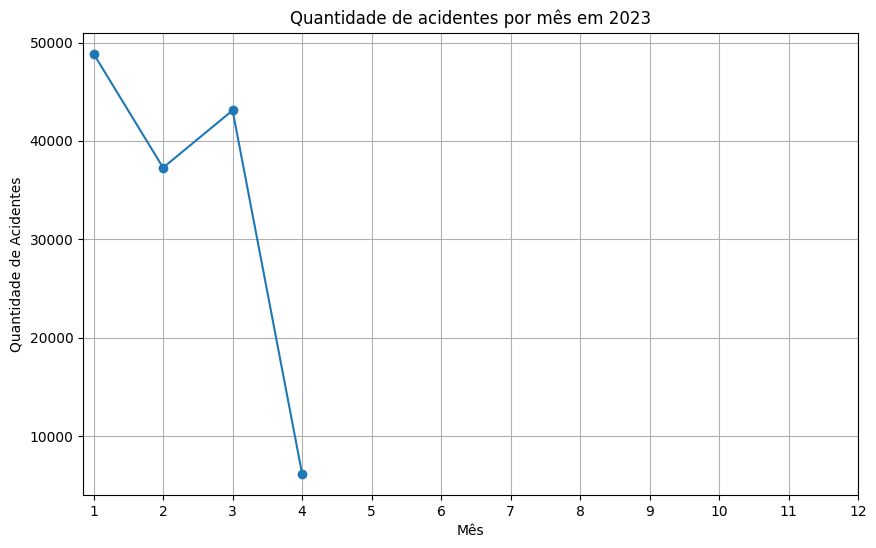

In [86]:
# Concatena as colunas 'data_inversa' e 'horario'
df['data_hora'] = df['data_inversa'] + ' ' + df['horario']
# Transforma a coluna de data em um objeto datetime
df['data_hora'] = pd.to_datetime(df['data_hora'])

# Conta o número de acidentes por mês
acidentes_por_mes_2023 = df[df['data_hora'].dt.year == 2023].groupby(df['data_hora'].dt.month).size()

# Plota um gráfico de linha dos dados
acidentes_por_mes_2023.plot(kind='line', marker='o', figsize=(10, 6))

plt.title('Quantidade de acidentes por mês em 2023')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

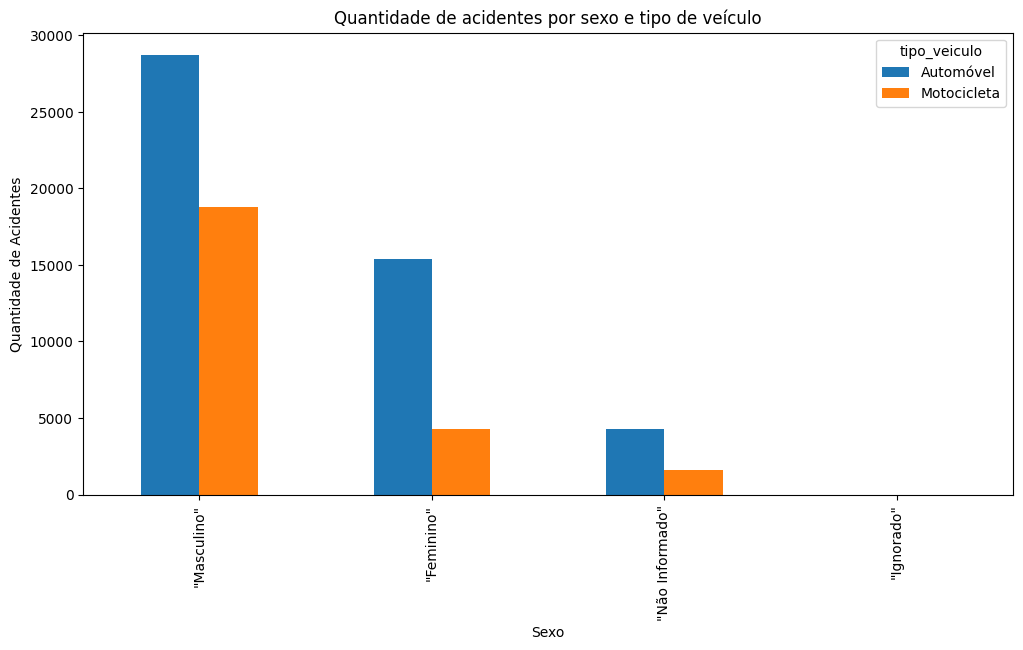

In [87]:
df_filtrado = df[df['tipo_veiculo'].isin(['Automóvel', 'Motocicleta'])]

# Agrupa os dados por sexo e tipo de veículo, e conta o número de registros em cada grupo
acidentes_por_sexo_veiculo = df_filtrado.groupby(['sexo', 'tipo_veiculo']).size().unstack()

acidentes_por_sexo_veiculo = acidentes_por_sexo_veiculo[acidentes_por_sexo_veiculo > 150]
# Plota um gráfico de barras dos dados agrupados
acidentes_por_sexo_veiculo = acidentes_por_sexo_veiculo.sort_values(by='Automóvel', ascending=False)
acidentes_por_sexo_veiculo.plot(kind='bar', stacked=False, figsize=(12, 6))

plt.title('Quantidade de acidentes por sexo e tipo de veículo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Acidentes')
plt.show()

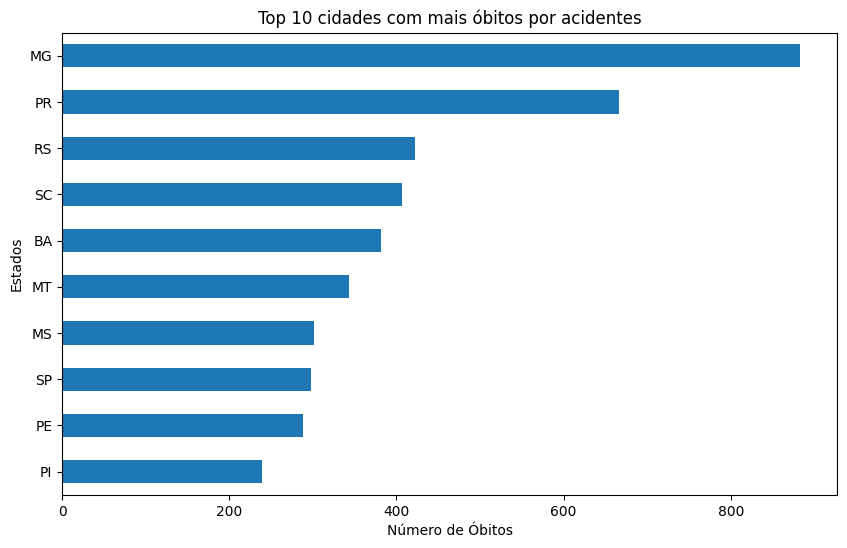

In [88]:
# Agrupa os dados por cidade e soma o número de óbitos em cada grupo
obitos_por_estado = df.groupby('uf')['mortos'].sum()

# Obtém as top 10 cidades com mais óbitos
top_10_estado = obitos_por_estado.nlargest(10)

top_10_estado = top_10_estado.sort_values(ascending=True)

# Plota um gráfico de barras dos dados
top_10_estado.plot(kind='barh', figsize=(10, 6))

plt.title('Top 10 cidades com mais óbitos por acidentes')
plt.ylabel('Estados')
plt.xlabel('Número de Óbitos')
plt.show()

In [89]:
# Conta o número de acidentes por município
acidentes_por_municipio = df['municipio'].value_counts()

# Transforma a Series em DataFrame e reseta o índice
acidentes_por_municipio = acidentes_por_municipio.reset_index()

# Renomeia as colunas
acidentes_por_municipio.columns = ['municipio', 'media_acidentes']

acidentes_por_municipio.head()

,municipio,media_acidentes
0,GUARULHOS,1913
1,BRASILIA,1563
2,CURVELO,1554
3,SAO JOSE DOS PINHAIS,1321
4,CURITIBA,1301


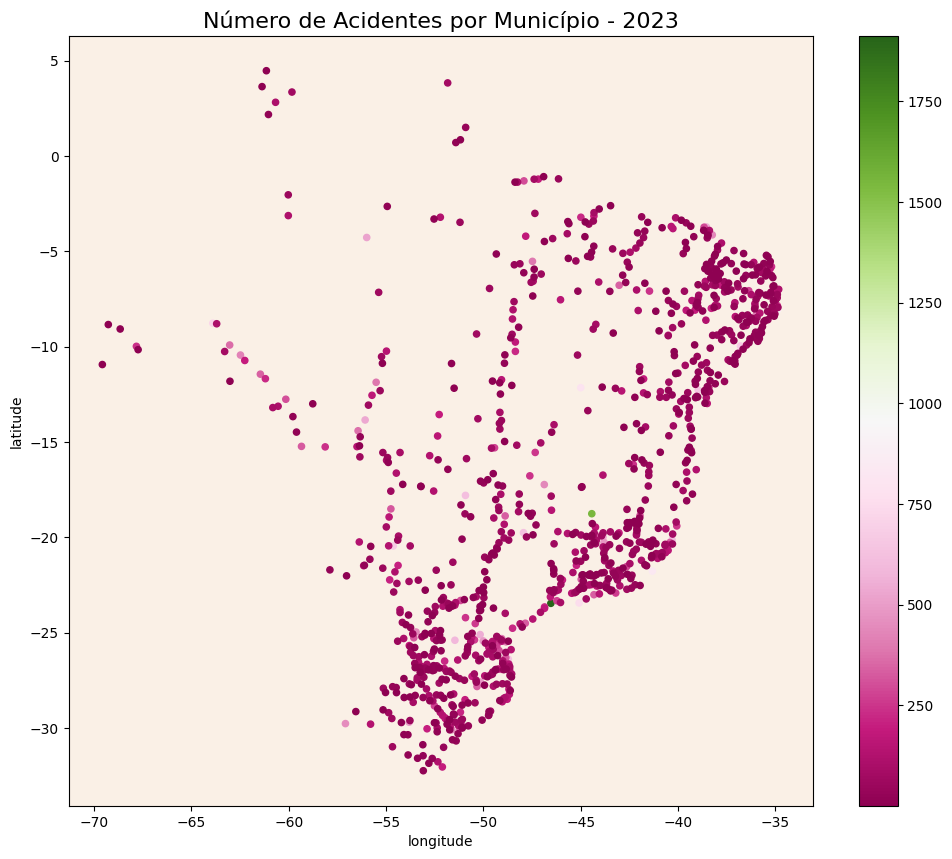

In [90]:

site = 'https://github.com/kelvins/Municipios-Brasileiros/blob/main/csv/municipios.csv?raw=true'

coordenadas = pd.read_csv(site)


coordenadas['nome'] = coordenadas['nome'].str.upper()

# Faz o merge com o DataFrame de coordenadas
concatenado_acidentes = pd.merge(acidentes_por_municipio, coordenadas, how='left', left_on='municipio', right_on='nome')

# Plota o gráfico
concatenado_acidentes.plot.scatter(y='latitude', x='longitude', 
                                   c=concatenado_acidentes['media_acidentes'],
                                   cmap='PiYG',
                                   figsize=(12,10)).set_title('Número de Acidentes por Município - 2023', fontsize=16)
ax = plt.gca()
ax.set_facecolor('linen')
plt.show();